In [ ]:
!pip install graphviz
!pip install anytree

In [8]:
import numpy as np
import pandas as pd
import math
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from anytree import Node as Node_anytree, RenderTree
from anytree.exporter import DotExporter

In [9]:
data = pd.read_csv("part2.csv")
data.head(12)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678,NaN
5,843786,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,...,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440,NaN
6,844359,M,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,...,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368,NaN
7,84458202,M,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,...,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510,NaN
8,844981,M,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,...,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720,NaN
9,84501001,M,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,...,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750,NaN


In [10]:
data = data.drop(['Unnamed: 32'], axis=1)
data = data.drop(['id'],axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
data.head(12)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,1,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [11]:
diagnosis = data['diagnosis']
features = data.drop(['diagnosis'], axis = 1)
features.head(12)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.26540,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.18600,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.24300,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.25750,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.16250,0.2364,0.07678
5,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,0.07613,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,0.05742,...,22.88,27.66,153.20,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,0.07451,...,17.06,28.14,110.60,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,0.07389,...,15.49,30.73,106.20,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
9,12.46,24.04,83.97,475.9,0.11860,0.23960,0.22730,0.08543,0.2030,0.08243,...,15.09,40.68,97.65,711.4,0.1853,1.0580,1.1050,0.22100,0.4366,0.20750


In [ ]:
print(len(features))

569


In [12]:
from sklearn.model_selection import train_test_split# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features,   
    diagnosis, test_size=0.25, random_state=42)

In [13]:
from sklearn.decomposition import PCA

pca = PCA(n_components=10)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


In [14]:
X_train=pd.DataFrame(data=X_train,    # values
             columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10'])  # 1st row as the column names

X_train.head(12)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,-327.261255,38.048845,-8.814960,9.804488,-5.373413,-0.601707,-0.393124,-0.475546,0.026853,-0.024861
1,-76.544074,-68.085907,-1.616940,-10.372448,-3.537179,1.524098,0.271986,-0.344450,0.168142,-0.168486
2,-283.353055,22.343584,-4.376849,-2.255663,-1.778066,0.895556,-0.077990,0.151431,0.213600,0.059357
3,651.683731,-19.755420,-34.442879,-10.602660,7.474982,0.151887,-0.349031,-0.474775,0.217746,-0.117978
4,1004.192157,128.383970,10.172314,-4.241524,-0.702267,1.217066,-0.931361,0.716118,-0.326562,-0.200033
5,112.822407,-5.494720,-27.357770,-1.459503,2.319809,-2.315866,-0.737771,-0.841075,-0.121610,-0.191717
6,-179.011246,29.551160,-1.009138,4.464157,-6.107990,-1.314303,-1.304925,-0.505819,-0.321043,-0.035947
7,162.920785,-33.611786,-19.306146,-4.054380,3.445855,0.275486,0.806039,-0.546071,-0.325865,-0.205409
8,-388.279178,21.807365,12.538750,6.682366,-4.461445,-1.090939,-0.925137,0.100789,-0.226351,-0.103300
9,-778.466242,-52.817630,16.068299,11.757871,6.819260,2.638699,-0.937286,-0.200814,0.261646,-0.222727


In [15]:
X_test=pd.DataFrame(data=X_test,    # values
             columns=['pca_1','pca_2','pca_3','pca_4','pca_5','pca_6','pca_7','pca_8','pca_9','pca_10'])  # 1st row as the column names

X_test.head(12)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,-258.173198,-43.844389,5.911875,-1.658788,-2.028851,-0.336213,-0.076233,-0.232543,-0.317070,-0.018207
1,1097.182399,-119.046553,-5.105702,-1.248133,-5.272598,1.459829,-2.489805,-0.307865,-0.661243,0.355032
2,290.160214,-68.852754,-7.522614,-2.361256,-3.834684,-1.599647,0.102061,-0.303803,-0.255038,-0.115519
3,-404.067720,29.579215,-2.319113,-1.518608,-2.730723,-0.472944,-0.039248,0.411966,0.719972,0.061158
4,-487.736099,5.090197,9.308693,5.790706,-2.519784,-1.375474,1.321334,0.414634,0.344384,0.406773
5,1130.900538,19.498984,-22.478816,-24.809998,-2.566227,3.746954,-2.107761,-0.462067,0.432083,0.698759
6,1591.966150,-9.655505,-2.552226,-4.821493,-8.609276,4.152841,-3.949943,-0.249196,0.043038,0.341249
7,460.200494,69.363063,-7.752083,0.457082,-9.953069,0.733416,-0.235700,0.450455,-0.293691,-0.236975
8,-292.331738,21.636395,-11.321615,-1.587118,-4.746743,-0.551340,1.654820,-0.277184,-0.566024,0.008024
9,-162.199725,34.081189,-17.645396,2.074987,-3.323247,0.838778,-0.331089,-0.643228,0.079782,0.041573


In [16]:
def find_data_set_range_for_each_coloumn_not_catogorical(data_set_feature,name_of_coloumn_not_categorical,number_of_cut):

    data_set_feature_details = data_set_feature.describe()
    diff = data_set_feature_details.iloc[7,:] - data_set_feature_details.iloc[3,:]
    diff = diff/number_of_cut
    print(diff)
    return diff
    


In [22]:
def make_coloumn_not_catogorical_catogorical(name_coloumn_with_bais_range,data_set_feature, columns_name,number_of_cut):
    data_set_feature_copy = data_set_feature.copy()
    for column in columns_name:
      for index in data_set_feature.index:

          if data_set_feature.loc[index,column] !=None and data_set_feature.loc[index,column] >= 0:
                for c in range(int(number_of_cut/2)):
                    # print(data_set_feature[column])
                    # print(data_set_feature.loc[j, column])
                    # index(data_set_feature.loc[index,column])
                    if data_set_feature.loc[index,column]!=None and (data_set_feature.loc[index,column] >= name_coloumn_with_bais_range[column]*c) and \
                      (data_set_feature.loc[index,column] < name_coloumn_with_bais_range[column]*(c+1)) and c != int(number_of_cut/2)-1:

                        map = c
                    
                    elif c == number_of_cut-1 and data_set_feature.loc[index,column]!=None and (data_set_feature.loc[index,column] >= name_coloumn_with_bais_range[column]*c):

                        map = c
                
                if data_set_feature_copy[column][index] != None and map == int(number_of_cut/2) - 1:
                      
                      data_set_feature_copy[column][index] = f'{column} >= {map*name_coloumn_with_bais_range[column]:.3f}'
                elif data_set_feature_copy[column][index] != None:

                      data_set_feature_copy[column][index] = f'{(map+1)*name_coloumn_with_bais_range[column]:.3f} > {column} >= {map*name_coloumn_with_bais_range[column]:.3f}'

          elif data_set_feature.loc[index,column] !=None and data_set_feature.loc[index,column] < 0:

                for c in range(int(number_of_cut/2)):
                    if data_set_feature.loc[index,column]!=None and (data_set_feature.loc[index,column] <= name_coloumn_with_bais_range[column]*c*-1) and \
                      (data_set_feature.loc[index,column] > name_coloumn_with_bais_range[column]*(c+1)*-1) and c != int(number_of_cut/2)-1:

                        map = c
                    
                    elif c == number_of_cut-1 and data_set_feature.loc[index,column]!=None and (data_set_feature.loc[index,column] >= name_coloumn_with_bais_range[column]*c*-1):

                        map = c
                
                if data_set_feature_copy[column][index] != None and map == int(number_of_cut/2) - 1:
                      
                      data_set_feature_copy[column][index] = f'{column} <= {-1*map*name_coloumn_with_bais_range[column]:.3f}'
                elif data_set_feature_copy[column][index] != None:

                      data_set_feature_copy[column][index] = f'{-1*(map+1)*name_coloumn_with_bais_range[column]:.3f} < {column} <= {-1*map*name_coloumn_with_bais_range[column]:.3f}'


    return data_set_feature_copy




In [18]:
name_coloumn_with_bais_range_10 = find_data_set_range_for_each_coloumn_not_catogorical(X_train,X_train.columns,10)

pca_1     468.262989
pca_2     121.447640
pca_3      40.911857
pca_4       5.947219
pca_5       3.991413
pca_6       1.164065
pca_7       1.151883
pca_8       0.762381
pca_9       0.399634
pca_10      0.350480
dtype: float64


In [20]:
print(len(X_train))
print(len(X_test))

426
143


In [23]:
X_train_all_catogorical = make_coloumn_not_catogorical_catogorical(name_coloumn_with_bais_range_10,X_train,X_train.columns,10)
X_train_all_catogorical.head(12)

<ipython-input-22-a0c77130aa84>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_feature_copy[column][index] = f'{(map+1)*name_coloumn_with_bais_range[column]:.3f} > {column} >= {map*name_coloumn_with_bais_range[column]:.3f}'
<ipython-input-22-a0c77130aa84>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_feature_copy[column][index] = f'{-1*(map+1)*name_coloumn_with_bais_range[column]:.3f} < {column} <= {-1*map*name_coloumn_with_bais_range[column]:.3f}'


,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,-468.263 < pca_1 <= 0.000,121.448 > pca_2 >= 0.000,-40.912 < pca_3 <= 0.000,11.894 > pca_4 >= 5.947,-7.983 < pca_5 <= -3.991,-1.164 < pca_6 <= 0.000,-1.152 < pca_7 <= 0.000,-0.762 < pca_8 <= 0.000,0.400 > pca_9 >= 0.000,-0.350 < pca_10 <= 0.000
1,-468.263 < pca_1 <= 0.000,-121.448 < pca_2 <= 0.000,-40.912 < pca_3 <= 0.000,-11.894 < pca_4 <= -5.947,-3.991 < pca_5 <= 0.000,2.328 > pca_6 >= 1.164,1.152 > pca_7 >= 0.000,-0.762 < pca_8 <= 0.000,0.400 > pca_9 >= 0.000,-0.350 < pca_10 <= 0.000
2,-468.263 < pca_1 <= 0.000,121.448 > pca_2 >= 0.000,-40.912 < pca_3 <= 0.000,-5.947 < pca_4 <= 0.000,-3.991 < pca_5 <= 0.000,1.164 > pca_6 >= 0.000,-1.152 < pca_7 <= 0.000,0.762 > pca_8 >= 0.000,0.400 > pca_9 >= 0.000,0.350 > pca_10 >= 0.000
3,936.526 > pca_1 >= 468.263,-121.448 < pca_2 <= 0.000,-40.912 < pca_3 <= 0.000,-11.894 < pca_4 <= -5.947,7.983 > pca_5 >= 3.991,1.164 > pca_6 >= 0.000,-1.152 < pca_7 <= 0.000,-0.762 < pca_8 <= 0.000,0.400 > pca_9 >= 0.000,-0.350 < pca_10 <= 0.000
4,1404.789 > pca_1 >= 936.526,242.895 > pca_2 >= 121.448,40.912 > pca_3 >= 0.000,-5.947 < pca_4 <= 0.000,-3.991 < pca_5 <= 0.000,2.328 > pca_6 >= 1.164,-1.152 < pca_7 <= 0.000,0.762 > pca_8 >= 0.000,-0.400 < pca_9 <= 0.000,-0.350 < pca_10 <= 0.000
5,468.263 > pca_1 >= 0.000,-121.448 < pca_2 <= 0.000,-40.912 < pca_3 <= 0.000,-5.947 < pca_4 <= 0.000,3.991 > pca_5 >= 0.000,-2.328 < pca_6 <= -1.164,-1.152 < pca_7 <= 0.000,-1.525 < pca_8 <= -0.762,-0.400 < pca_9 <= 0.000,-0.350 < pca_10 <= 0.000
6,-468.263 < pca_1 <= 0.000,121.448 > pca_2 >= 0.000,-40.912 < pca_3 <= 0.000,5.947 > pca_4 >= 0.000,-7.983 < pca_5 <= -3.991,-2.328 < pca_6 <= -1.164,-2.304 < pca_7 <= -1.152,-0.762 < pca_8 <= 0.000,-0.400 < pca_9 <= 0.000,-0.350 < pca_10 <= 0.000
7,468.263 > pca_1 >= 0.000,-121.448 < pca_2 <= 0.000,-40.912 < pca_3 <= 0.000,-5.947 < pca_4 <= 0.000,3.991 > pca_5 >= 0.000,1.164 > pca_6 >= 0.000,1.152 > pca_7 >= 0.000,-0.762 < pca_8 <= 0.000,-0.400 < pca_9 <= 0.000,-0.350 < pca_10 <= 0.000
8,-468.263 < pca_1 <= 0.000,121.448 > pca_2 >= 0.000,40.912 > pca_3 >= 0.000,11.894 > pca_4 >= 5.947,-7.983 < pca_5 <= -3.991,-1.164 < pca_6 <= 0.000,-1.152 < pca_7 <= 0.000,0.762 > pca_8 >= 0.000,-0.400 < pca_9 <= 0.000,-0.350 < pca_10 <= 0.000
9,-936.526 < pca_1 <= -468.263,-121.448 < pca_2 <= 0.000,40.912 > pca_3 >= 0.000,11.894 > pca_4 >= 5.947,7.983 > pca_5 >= 3.991,3.492 > pca_6 >= 2.328,-1.152 < pca_7 <= 0.000,-0.762 < pca_8 <= 0.000,0.400 > pca_9 >= 0.000,-0.350 < pca_10 <= 0.000


In [24]:
X_train.head(12)

,pca_1,pca_2,pca_3,pca_4,pca_5,pca_6,pca_7,pca_8,pca_9,pca_10
0,-327.261255,38.048845,-8.814960,9.804488,-5.373413,-0.601707,-0.393124,-0.475546,0.026853,-0.024861
1,-76.544074,-68.085907,-1.616940,-10.372448,-3.537179,1.524098,0.271986,-0.344450,0.168142,-0.168486
2,-283.353055,22.343584,-4.376849,-2.255663,-1.778066,0.895556,-0.077990,0.151431,0.213600,0.059357
3,651.683731,-19.755420,-34.442879,-10.602660,7.474982,0.151887,-0.349031,-0.474775,0.217746,-0.117978
4,1004.192157,128.383970,10.172314,-4.241524,-0.702267,1.217066,-0.931361,0.716118,-0.326562,-0.200033
5,112.822407,-5.494720,-27.357770,-1.459503,2.319809,-2.315866,-0.737771,-0.841075,-0.121610,-0.191717
6,-179.011246,29.551160,-1.009138,4.464157,-6.107990,-1.314303,-1.304925,-0.505819,-0.321043,-0.035947
7,162.920785,-33.611786,-19.306146,-4.054380,3.445855,0.275486,0.806039,-0.546071,-0.325865,-0.205409
8,-388.279178,21.807365,12.538750,6.682366,-4.461445,-1.090939,-0.925137,0.100789,-0.226351,-0.103300
9,-778.466242,-52.817630,16.068299,11.757871,6.819260,2.638699,-0.937286,-0.200814,0.261646,-0.222727


In [25]:
y_true = y_test.to_numpy()

In [26]:
from sklearn.metrics import accuracy_score,precision_score,recall_score

def find_metrics(name,y_true, y_pred):
    acc_my_machine = accuracy_score(y_true, y_pred)
    precision_my_machine = precision_score(y_true, y_pred)
    recall_my_machine = recall_score(y_true, y_pred)
    F1_Measure_my_machine = (2*precision_my_machine * recall_my_machine)/(precision_my_machine + recall_my_machine)
    if name != "NO_PRINT":
        print(f"acc_{name} : {acc_my_machine:.3f} \nprecision_{name} : {precision_my_machine:.3f}\nrecall_{name} :{recall_my_machine:.3f}\nF1_Measure_{name} : {F1_Measure_my_machine:.3f}")

    return acc_my_machine,precision_my_machine,recall_my_machine,F1_Measure_my_machine

In [27]:
def make_node(dictionary_tree,father=None):
   
    if dictionary_tree['child'] == None:
        return Node_anytree(dictionary_tree['text'],parent=father)
    else:
        
        if father is None:
               root =  Node_anytree(dictionary_tree['text'])
        else:
               root = Node_anytree(dictionary_tree['text'],parent=father)
        
        for item in dictionary_tree['child']:
            make_node(item,father=root)
    
    return root

In [28]:
def post_prune_tree(decision_tree,alph):

    root_depth = decision_tree.root.find_depth_tree()
    print(f"before main_tree_root_depth : {root_depth}")
    root_number_leaves = decision_tree.root.find_leaves()
    print(f"before main_tree_root_number_leaves : {root_number_leaves}")
    emperical_erro = decision_tree.find_emperical_error()
    print(f"before main_tree_root_emperical_erro : {emperical_erro}")
    main_tree_complexity = emperical_erro + alph * root_number_leaves 
    
    emperical_erro = decision_tree.find_emperical_error()
    root_number_depth = decision_tree.root.find_depth_tree()
    root_number_leaves = decision_tree.root.find_leaves()

    while True:
        k = 0
        list_of_gain_each_child = []
        for child in decision_tree.root.childs:
            k += 1
            if not child.is_leaf():
              
                gain,best_child = child.best_del_achivement(alph)
                list_of_gain_each_child.append([gain,k,best_child])

        if len(list_of_gain_each_child) == 0:
          print("I cant find any good point1")
          break
          
        for item in list_of_gain_each_child:
            number_success = 0
            if item[0] < 0 :
                number_success += 1
                item[2].leaf = True
        if number_success == 0 :
            print("I cant find any good point2")
            break
        print(f"before main_tree_complexity : {main_tree_complexity}")
        main_tree_complexity = emperical_erro + alph * root_number_leaves 
        print(f"after main_tree_complexity : {main_tree_complexity}")
        emperical_erro = decision_tree.find_emperical_error()
        print(f"after main_tree_emperical_error : {emperical_erro}")
        root_number_depth = decision_tree.root.find_depth_tree()
        print(f"after main_tree_root_number_depth : {root_number_depth}")
        root_number_leaves = decision_tree.root.find_leaves()
        print(f"after main_tree_root_number_leaves : {root_number_leaves}")
    return decision_tree,main_tree_complexity,emperical_erro,root_number_depth,root_number_leaves

In [29]:
class Node:
    def __init__(self,feature=None,
                 feat_number=None,
                 most_commen_child=None,
                 choice_from_father=None,
                 list_of_childs = None,
                 number_of_each_child_have_childs = None,
                 gini=None,
                 use_father_value=None,
                 leaf=None,
                 emprical_error = None,
                 value=None):


        self.feature = feature
        self.most_commen_child = most_commen_child
        self.number_of_each_child_have_childs = number_of_each_child_have_childs
        self.feat_number = feat_number
        self.gini = gini
        self.use_father_value = use_father_value
        self.emprical_error = emprical_error

        self.choice_from_father = choice_from_father
        self.childs = list_of_childs
        


        self.leaf = leaf
        self.value = value
    
    
    def is_leaf(self):
        return self.leaf    
    
    


    def show_node(self):
      enter = '\n'
      if self.is_leaf():
        return {"text":f"{self.choice_from_father} = {self._show_value()}","child":None}
      else :
        
        list_of_show_child =[]
        for child in self.childs:
            list_of_show_child.append(child.show_node())
        
        return {"text":f"{self.choice_from_father} _ {self.feature}","child": list_of_show_child}
    
    def _show_value(self):
        return self.value

    def make_plot(self,name="Tree.png"):

        show_node_in_dic = self.show_node()
        
        root = make_node(show_node_in_dic)

        DotExporter(root).to_picture(name)
    
    def find_depth_tree(self):
      
      if self.is_leaf():
          return 1
      else :
          # print('hi')
          max_depth = 0
          for child in self.childs :
              depth = 1+child.find_depth_tree()

              if max_depth < depth :
                  max_depth = depth
          
          return max_depth



    def find_leaves(self):

      if self.is_leaf():
          return 1
      else :

          leaves = 0
          for child in self.childs :
              leaves += child.find_leaves()

          return leaves

    def best_del_achivement(self,alph):

        
        is_all_of_its_child_leaf = True

        for child in self.childs :

            if not child.is_leaf():
              
                is_all_of_its_child_leaf  = False
                break

        
        if is_all_of_its_child_leaf:

            child_erro = 0

            for child in self.childs:
              child_erro += child.emprical_error

            return (self.emprical_error -  child_erro) - (alph*(len(self.childs)-1)),self
        
        else:
              best_achivement = np.inf
              best_child_for_del = None
              for child in self.childs:
                  if not child.is_leaf():
                      child_achivement,child = child.best_del_achivement(alph)
                  
                      if best_achivement > child_achivement:
                          best_achivement = child_achivement
                          best_child_for_del = child
              return best_achivement,best_child_for_del





In [30]:


class DecisionTree_Binery_Res_gini:
    def __init__(self,list_of_feature_name,max_depth=100,minmum_diference_gini=0,number_of_child_must_be_in_each_node=2):
        self.list_of_feature_name = list_of_feature_name
        self.max_depth = max_depth
        self.first = True
        self.root = Node
        self.minmum_diference_gini = minmum_diference_gini
        self.number_of_child_must_be_in_each_node = number_of_child_must_be_in_each_node



    def _is_finished(self, depth,number_of_childs_have):
        if (depth >= self.max_depth
            or self.n_class_labels == 1
            or number_of_childs_have < self.number_of_child_must_be_in_each_node):
            return True
        return False
    
    def _gini(self, y):

        if len(y)==0:
          return 0
        proportions = np.bincount(y) / len(y)
        gini = proportions[0]*(1-proportions[0])
        return gini

    def _create_split(self, X, list_of_category):

        dic_of_variable = {}
        for item in list_of_category :
                idx = np.argwhere(X == item).flatten()
                dic_of_variable[item] = idx

        return dic_of_variable


    def _find_Remainder(self,dic_of_variable:dict,n,y):

      Remainder = 0
      # print(dic_of_variable)
      for key in  dic_of_variable:
        # print(key)
        Remainder += (len(dic_of_variable[key])/n) * self._gini(y[dic_of_variable[key]])

      return Remainder

    def _information_gain(self, X, y, list_of_category):
        Gini = self._gini(y)
        dic_of_variable = self._create_split(X, list_of_category)
        n = len(y)
        
        Remainder = self._find_Remainder(dic_of_variable,n,y)
        return Gini - Remainder

    def _best_split(self, X, y, features):
        best_split = - 1
        best_feat = None
        best_list_of_category = None


        for feat in features:
            X_feat = X[:, feat]
            all_data_feat = self.data[:,feat]
            list_of_category = np.unique(all_data_feat)
            # for thresh in thresholds:
            score = self._information_gain(X_feat, y, list_of_category)
            if score > best_split:
                    best_split = score
                    best_feat = feat
                    best_list_of_category = list_of_category

        return best_feat, best_list_of_category, best_split
    
    def tree_show(self):
      
        return self.root.show_node()

    def make_plot(self,name):

        return self.root.make_plot(name)


    def _find_perobabilty_of_pasetive(self,numpy_array,perobabilty_of_pasetive_of_father):

          
          unique_list, counts = np.unique(numpy_array, return_counts=True)

           
          if len(unique_list) == 1:

            if unique_list[0] == 1:

                return 1
            
            else:

                return 0

          if unique_list[0] == 1:
              number_pos = counts[0]
            
          else :
              number_pos = counts[1]

            
          if number_pos / (counts[0]+counts[1]) == 0.5:

              return perobabilty_of_pasetive_of_father

          else :

              return number_pos / (counts[0]+counts[1])


            


    def find_emperical_error(self,node=None):
        if node is None :
          node =self.root

        if node.is_leaf():
            return node.emprical_error
        
        emp_error = 0
        for child in node.childs:
            emp_error += self.find_emperical_error(child)
        return emp_error


    def _build_tree(self, X, y,map_feature_number:list,perobabilty_of_pasetive_of_father,choice_from_father,depth=0):

        self.n_samples, self.n_features = X.shape
        self.n_class_labels = len(np.unique(y))
        
        if self.first == True:
            self.data = X
            self.first = False
            


        if self._is_finished(depth,len(X)) or len(map_feature_number)==0:
            if len(y) == 0 :
                return Node(choice_from_father = choice_from_father ,
                            value=perobabilty_of_pasetive_of_father ,
                            leaf = True,
                            emprical_error = 0,
                            gini = 0,
                            use_father_value = True
                            )



            perobabilty_of_pasetive = self._find_perobabilty_of_pasetive(y,perobabilty_of_pasetive_of_father)
            if perobabilty_of_pasetive > 0.5 :
                emperical_erro = len(y) * (1-perobabilty_of_pasetive)
            else :
                 emperical_erro = len(y) * (perobabilty_of_pasetive)

            return Node(choice_from_father = choice_from_father , 
                        value=perobabilty_of_pasetive,
                        leaf = True,
                        emprical_error = emperical_erro,
                        gini = self._gini(y),
                        use_father_value = False
                        )
            
        
        perobabilty_of_pasetive = self._find_perobabilty_of_pasetive(y,perobabilty_of_pasetive_of_father)
        if perobabilty_of_pasetive > 0.5 :
              emperical_erro = len(y) * (1-perobabilty_of_pasetive)
        else :
              emperical_erro = len(y) * (perobabilty_of_pasetive)

        # get best split
        best_feat, list_of_category,gini = self._best_split(X, y, map_feature_number)
        if gini <= self.minmum_diference_gini :
              return Node(choice_from_father=choice_from_father,
                                             value=perobabilty_of_pasetive,
                                             gini=self._gini(y),
                                             leaf=True,
                                             emprical_error = emperical_erro,
                                             use_father_value = False,  
                                             )


        map_feature_number_copy = map_feature_number.copy()
        map_feature_number_copy.remove(best_feat)

        dic_of_variable = self._create_split(X[:, best_feat], list_of_category)
        
        list_of_childs = []
        number_of_child_each_child =[]

        for key in dic_of_variable:
            
            most_commen_child = None
            number_item_most_commen = -1
            helper = 0
            number_of_child_each_child.append(dic_of_variable[key])

            if len(dic_of_variable[key]) != 0 :
                  child = self._build_tree(X[dic_of_variable[key],:],
                                                    y[dic_of_variable[key]],
                                                    map_feature_number_copy,
                                                    perobabilty_of_pasetive,
                                                    key,
                                                    depth + 1)
                  list_of_childs.append(child)
                  helper = len(X[dic_of_variable[key],:])
                  if helper > number_item_most_commen :

                      most_commen_child = child

            else:

                  list_of_childs.append(Node(choice_from_father=key,
                                             value=perobabilty_of_pasetive,
                                             emprical_error=0,
                                             leaf=True,
                                             gini = 0,
                                             use_father_value = True))
              



        return Node(feature = self.list_of_feature_name[best_feat],
                    feat_number = best_feat,
                    most_commen_child = most_commen_child,
                    choice_from_father = choice_from_father,
                    list_of_childs = list_of_childs,
                    number_of_each_child_have_childs = number_of_child_each_child,
                    gini = gini ,
                    leaf = False ,
                    emprical_error = emperical_erro ,
                    value = perobabilty_of_pasetive)





    def _traverse_tree(self, x, node):
        if node.is_leaf():
            return node.value
        
        for child in node.childs:
          if x[node.feat_number] == child.choice_from_father:
            return self._traverse_tree(x,child)
        return self._traverse_tree(x,node.most_commen_child)


    def fit(self, X, y,map_feature_number):
        map_feature_number = map_feature_number
        firt_prob = self._find_perobabilty_of_pasetive(y,0.5)
        choice_from_father = "root"
        self.root = self._build_tree(X, y,map_feature_number,firt_prob,choice_from_father)

    def predict(self,X):
        predictions = [self._traverse_tree(x, self.root) for x in X]
        return np.array(predictions)

    def predict_by_thershold_out_put(self,X,thershold):

        predict = self.predict(X)
        res = []
        for i in predict:
          if i >= thershold:
            res.append(1)
          else:
            res.append(0)
        return np.array(res)
        

In [31]:
list_of_feature_name = list(X_train_all_catogorical.columns.values)
# print(len(list_of_feature_name))
map_feature_number = [i for i in range(len(list_of_feature_name))]

np_train_x = X_train_all_catogorical.to_numpy()
np_label_train = y_train.to_numpy()

probelity_Binery_Res = DecisionTree_Binery_Res_gini(list_of_feature_name,max_depth=30)
probelity_Binery_Res.fit(np_train_x,np_label_train,map_feature_number)


In [32]:
X_test_all_catogorical = make_coloumn_not_catogorical_catogorical(name_coloumn_with_bais_range_10,X_test,X_train.columns,10)
X_test_all_catogorical_numpy = X_test_all_catogorical.to_numpy()

<ipython-input-22-a0c77130aa84>:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_feature_copy[column][index] = f'{-1*(map+1)*name_coloumn_with_bais_range[column]:.3f} < {column} <= {-1*map*name_coloumn_with_bais_range[column]:.3f}'
<ipython-input-22-a0c77130aa84>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_set_feature_copy[column][index] = f'{(map+1)*name_coloumn_with_bais_range[column]:.3f} > {column} >= {map*name_coloumn_with_bais_range[column]:.3f}'


In [33]:
y_pred_probelity = probelity_Binery_Res.predict(X_test_all_catogorical_numpy)

In [34]:
print(y_pred_probelity)

[0.         1.         1.         0.         0.         1.
 1.         0.         1.         0.         0.4        1.
 0.         0.75       0.         1.         0.         0.
 0.         1.         0.         0.         1.         0.
 0.         0.         0.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 1.         0.         1.         0.         0.         1.
 0.         0.         0.         0.         0.         0.
 0.         0.         1.         1.         1.         0.01282051
 0.         0.         0.         1.         1.         0.
 0.         1.         1.         0.         0.         0.
 1.         1.         0.         0.         1.         1.
 0.         1.         0.         0.         0.30769231 0.
 0.         0.         1.         0.         1.         1.
 1.         1.         1.         1.         0.         0.
 0.         0.         0.         0.         0.         0.
 1.         1.         0.         1.         1. 

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay


In [ ]:
# decision_tree,main_tree_complexity,emperical_erro,root_number_depth,root_number_leaves = post_prune_tree(probelity_Binery_Res,0.53)


In [36]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

def show_metrics_and_RocCurve_confusion_matrix(y_pred,y_pred_binary,y_true,name,label_0,label_1):


    RocCurveDisplay.from_predictions(
    y_true,
    y_pred,
    name=f"rocCurve",
    color="darkorange",)
    plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
    plt.axis("square")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("show rocCurve")
    plt.legend()
    plt.show()

    find_metrics(name,y_true, y_pred_binary)
    cm = confusion_matrix(y_true, y_pred_binary, normalize='all')
    cmd = ConfusionMatrixDisplay(cm, display_labels=[label_0,label_1])
    cmd.plot()




In [37]:
import numpy as np
import matplotlib.pyplot as plt
import copy

def make_plot_to_find_best_alpha(model,X_validation,Y_validation):

        random_alpha_numbers = np.sort(np.random.choice(
        range(1, 100),
        60,
        replace=False) * (1/100))


        random_alpha_numbers = np.insert(random_alpha_numbers, 0, 0)

        list_of_model = [copy.deepcopy(model) for item in random_alpha_numbers]

        list_of_depth = []
        list_of_leaves = []
        list_of_accuracy = []
        list_of_f1_score = []
        list_of_emperical_error = []
        list_of_main_tree_complexity =[]
        k = 0
        for alpha in random_alpha_numbers:
            # print(alpha)
            model = list_of_model[k]
            print("###############################################################")
            decision_tree,main_tree_complexity,emperical_erro,root_number_depth,root_number_leaves = post_prune_tree(model,alpha)
            print("###############################################################")
            list_of_depth.append(root_number_depth)
            list_of_leaves.append(root_number_leaves)
            list_of_emperical_error.append(emperical_erro)
            list_of_main_tree_complexity.append(main_tree_complexity)

            y_pred = decision_tree.predict_by_thershold_out_put(X_validation,0.5)
            acc_my_machine,precision_my_machine,recall_my_machine,F1_Measure_my_machine = find_metrics("NO_PRINT",Y_validation, y_pred)
            list_of_accuracy.append(acc_my_machine)
            list_of_f1_score.append(F1_Measure_my_machine)
            k += 1


        xpoints = random_alpha_numbers
        ypoints = np.array(list_of_depth)
        plt.title('changing alpha and effect of depth')
        plt.plot(xpoints, ypoints)
        plt.show()

        ypoints2 = np.array(list_of_leaves)
        plt.title('changing alpha and effect of leaves')
        plt.plot(xpoints, ypoints2)
        plt.show()


        ypoints3 = np.array(list_of_emperical_error)
        plt.title('changing alpha and effect of emperical error')
        plt.plot(xpoints, ypoints3)
        plt.show()


        # ypoint4 = np.array(list_of_main_tree_complexity)
        # plt.title('changing alpha and effect of main formula I define')
        # plt.plot(xpoints, ypoint4)
        # plt.show()

        ypoint5 = np.array(list_of_accuracy)
        plt.title('changing alpha and effect on accuracy')
        plt.plot(xpoints, ypoint5)
        plt.show()


        ypoint6 = np.array(list_of_f1_score)
        plt.title('changing alpha and effect on f1 score')
        plt.plot(xpoints, ypoint6)
        plt.show()



###############################################################
before main_tree_root_depth : 8
before main_tree_root_number_leaves : 180
before main_tree_root_emperical_erro : 0
I cant find any good point2
###############################################################
###############################################################
before main_tree_root_depth : 8
before main_tree_root_number_leaves : 180
before main_tree_root_emperical_erro : 0
I cant find any good point2
###############################################################
###############################################################
before main_tree_root_depth : 8
before main_tree_root_number_leaves : 180
before main_tree_root_emperical_erro : 0
I cant find any good point2
###############################################################
###############################################################
before main_tree_root_depth : 8
before main_tree_root_number_leaves : 180
before main_tree_root_emperical_erro : 0
I cant f

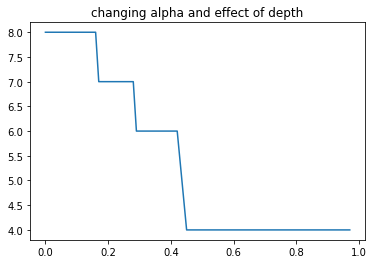

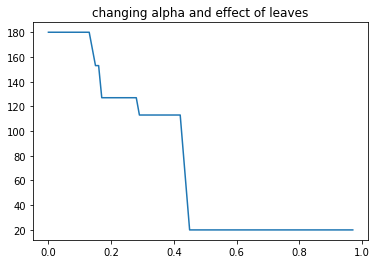

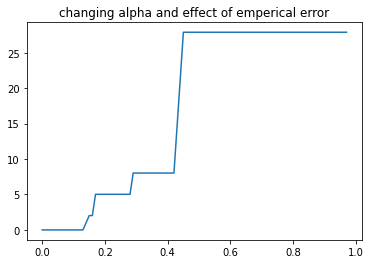

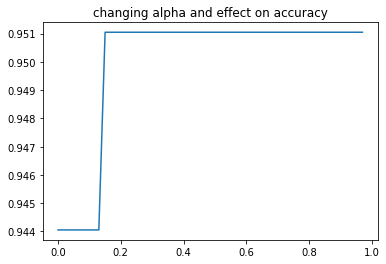

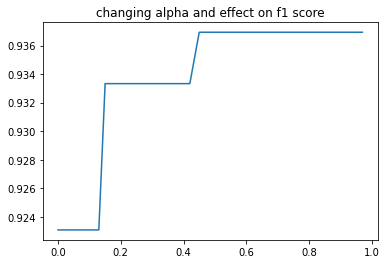

In [38]:
make_plot_to_find_best_alpha(probelity_Binery_Res,X_test_all_catogorical_numpy,y_true)

In [39]:
decision_tree,main_tree_complexity,emperical_erro,root_number_depth,root_number_leaves = post_prune_tree(probelity_Binery_Res,0.8)


before main_tree_root_depth : 8
before main_tree_root_number_leaves : 180
before main_tree_root_emperical_erro : 0
before main_tree_complexity : 144.0
after main_tree_complexity : 144.0
after main_tree_emperical_error : 1.0256410256410255
after main_tree_root_number_depth : 8
after main_tree_root_number_leaves : 167
before main_tree_complexity : 144.0
after main_tree_complexity : 134.62564102564102
after main_tree_emperical_error : 2.025641025641025
after main_tree_root_number_depth : 8
after main_tree_root_number_leaves : 153
before main_tree_complexity : 134.62564102564102
after main_tree_complexity : 124.42564102564103
after main_tree_emperical_error : 3.0256410256410255
after main_tree_root_number_depth : 8
after main_tree_root_number_leaves : 140
before main_tree_complexity : 124.42564102564103
after main_tree_complexity : 115.02564102564102
after main_tree_emperical_error : 5.0256410256410255
after main_tree_root_number_depth : 7
after main_tree_root_number_leaves : 127
before ma

In [40]:
y_pred_probelity = decision_tree.predict(X_test_all_catogorical_numpy)
y_pred_binary = decision_tree.predict_by_thershold_out_put(X_test_all_catogorical_numpy,0.5)

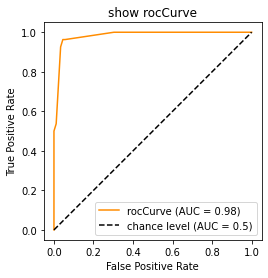

acc_cancer : 0.951 
precision_cancer : 0.912
recall_cancer :0.963
F1_Measure_cancer : 0.937


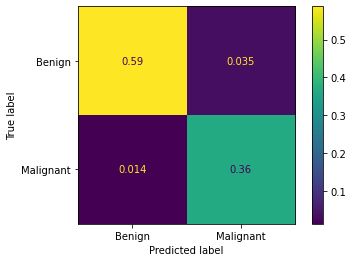

In [41]:
show_metrics_and_RocCurve_confusion_matrix(y_pred_probelity,y_pred_binary,y_true,"cancer","Benign","Malignant")

In [42]:
decision_tree.root.find_depth_tree()

4

In [43]:
decision_tree.root.find_leaves()

20

In [44]:
from sklearn.tree import DecisionTreeClassifier


clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

clf_pre = clf.predict(X_test)

In [45]:
x = find_metrics('lib',y_true,clf_pre)

acc_lib : 0.937 
precision_lib : 0.941
recall_lib :0.889
F1_Measure_lib : 0.914


In [46]:
decision_tree.make_plot("10_pac_cancer_by_gini_main_10_categorical.png")